
# **Assignment:02 various dimensionality reduction techniques**






# **PCA** **Implementation**

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Read CSV File 

In [ ]:
df = pd.read_csv('/content/Iris.csv')

First five enteries from dataset

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

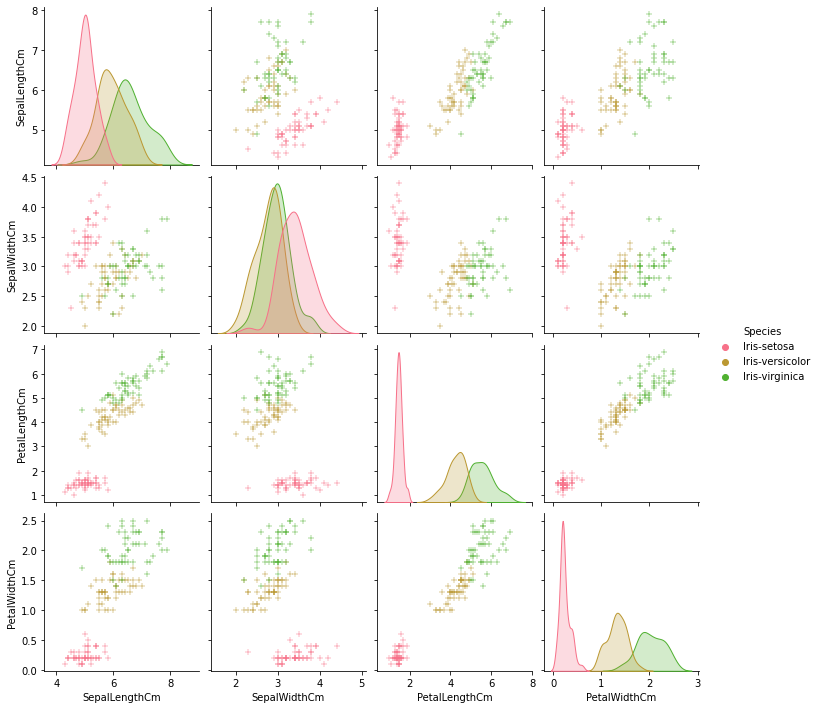

In [ ]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [ ]:
X_variables = df.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_variable = df.iloc[:,5]

In [ ]:
standard = StandardScaler()
transformed_df = standard.fit_transform(X_variables)

In [ ]:

cov_matrix = np.cov(transformed_df.T)

In [ ]:
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
eign = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eign:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [ ]:
pca = PCA()

In [ ]:
pca = pca.fit(transformed_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

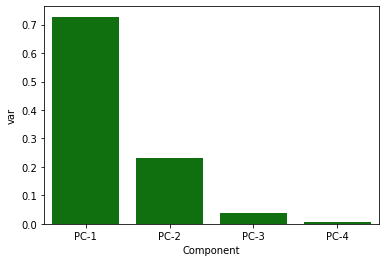

In [ ]:
dataframe = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'Component':['PC-1','PC-2','PC-3','PC-4']})
sns.barplot(x='Component',y="var", 
           data=dataframe, color="g");

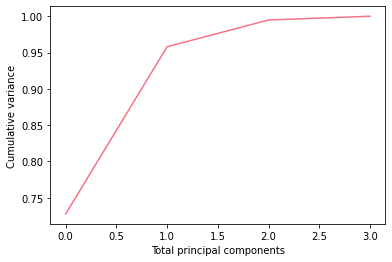

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Total principal components')
plt.ylabel('Cumulative variance')
plt.show()

In [ ]:
pca2 = PCA(n_components =2 )
pca2 = pca2.fit(transformed_df)
pca2d = pca2.transform(X_variables)

In [ ]:
df['Species'] = df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


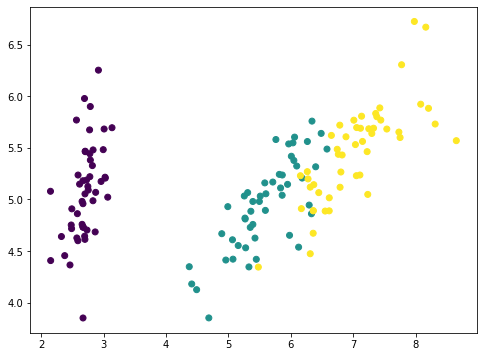

In [ ]:

plt.figure(figsize=(8,6))

plt.scatter(pca2d[:,0], pca2d[:,1],c=df['Species'])
plt.show()

In [ ]:
pca4 = PCA(n_components =4 )
pca4 = pca4.fit(transformed_df)
pca4d = pca4.transform(X_variables)

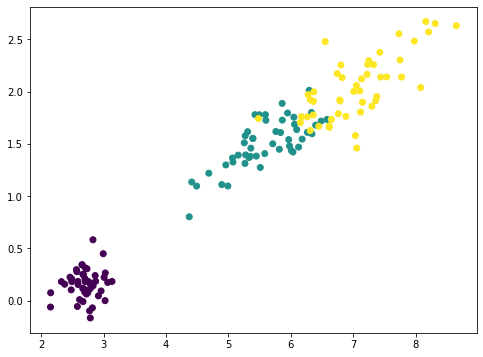

In [ ]:

plt.figure(figsize=(8,6))

plt.scatter(pca4d[:,0], pca4d[:,3],c=df['Species'])
plt.show()

# **SVD** **Implementation**

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

Reading CSV File

In [ ]:
df1 = pd.read_csv('/content/mushroomDataset.csv')

In [ ]:
df1.shape

(8124, 23)

In [ ]:
print(df1.describe())

        RingNumber
count  8124.000000
mean      1.069424
std       0.271064
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000


In [ ]:
print(df1.head())

  CapShape CapSurface CapColor  ...  Population  Habitat      Class
0   convex     smooth    brown  ...   scattered    urban  poisonous
1   convex     smooth   yellow  ...    numerous  grasses     edible
2     bell     smooth    white  ...    numerous  meadows     edible
3   convex      scaly    white  ...   scattered    urban  poisonous
4   convex     smooth     gray  ...    abundant  grasses     edible

[5 rows x 23 columns]


In [ ]:
encoder = LabelEncoder()

In [ ]:
print(df1.tail())

     CapShape CapSurface CapColor  ...  Population Habitat      Class
8119  knobbed     smooth    brown  ...   clustered  leaves     edible
8120   convex     smooth    brown  ...     several  leaves     edible
8121     flat     smooth    brown  ...   clustered  leaves     edible
8122  knobbed      scaly    brown  ...     several  leaves  poisonous
8123   convex     smooth    brown  ...   clustered  leaves     edible

[5 rows x 23 columns]


In [ ]:
print(df1.columns)

Index(['CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttachment', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilType', 'VeilColor',
       'RingNumber', 'RingType', 'SporePrintColor', 'Population', 'Habitat',
       'Class'],
      dtype='object')


In [ ]:
for clm in df1.columns:
    df1[clm] = encoder.fit_transform(df1[clm])

In [ ]:
df1.head()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,StalkRoot,StalkSurfaceAboveRing,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
0,2,3,0,1,7,1,0,1,0,0,3,3,3,7,7,0,2,1,4,0,3,4,1
1,2,3,9,1,0,1,0,0,0,0,2,3,3,7,7,0,2,1,4,1,2,0,0
2,0,3,8,1,1,1,0,0,1,0,2,3,3,7,7,0,2,1,4,1,2,2,0
3,2,2,8,1,7,1,0,1,1,0,3,3,3,7,7,0,2,1,4,0,3,4,1
4,2,3,3,0,6,1,1,0,0,1,3,3,3,7,7,0,2,1,0,1,0,0,0


In [ ]:
X_variables = df1.iloc[:,1:23]
y_label = df1.iloc[:, 0]

In [ ]:
sc = StandardScaler()
X_features = sc.fit_transform(X_variables)

In [ ]:
x, y, z = np.linalg.svd(X_features, full_matrices=True)

In [ ]:
x.shape

(8124, 8124)

In [ ]:

y.shape

(22,)

In [ ]:
z.shape

(22, 22)

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 


array([0.179, 0.149, 0.114, 0.11 , 0.082, 0.076, 0.043, 0.036, 0.033,
       0.028, 0.027, 0.025, 0.021, 0.02 , 0.017, 0.012, 0.008, 0.006,
       0.005, 0.003, 0.003, 0.   ])

Text(0, 0.5, 'Percent of the variance explained')

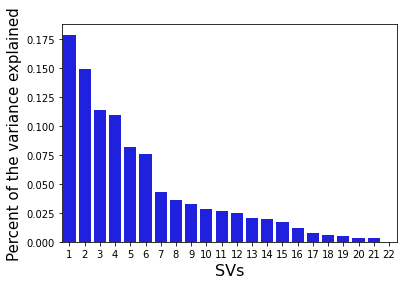

In [ ]:
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:

col_labels= ['SV'+str(i) for i in range(1,3)]
svddf = pd.DataFrame(x[:,0:2],index=df1["CapShape"].tolist(), columns=col_labels)
svddf=svddf.reset_index()
svddf.rename(columns={'index':'CapShape'}, inplace=True)
svddf.head()

,CapShape,SV1,SV2
0,2,0.003502,0.002084
1,2,0.011184,0.009706
2,0,0.011725,0.007601
3,2,0.005281,0.001889
4,2,0.000484,0.026489


In [ ]:
svddf['CapShape'] = svddf['CapShape'].replace({5:'Good', 0:'Bad'})

Text(0, 0.5, 'SV 2: 14.899999999999999%')

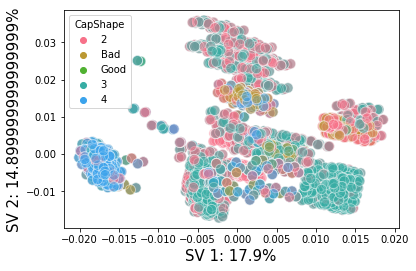

In [ ]:
color_dict = dict({'Good':'Red',
                   'Bad': 'Green'})
# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="CapShape", 
                #palette=color_dict, 
                data=svddf, s=105,
                alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

Conclusions:

1.So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables.

2.In theory, the PCA makes no difference, but in practice, it improves training speed, simplifies the neural up the required to represent the data, and outcomes in processes that better classify the data's "intermediate structure" rather than having to account for multiple scales - it is more accurate.

3.T-SNE is a non-linear data visualizer, unlike PCA and LDA. It doesn't utilize a straight line to separate the classes or calculate variance, and it doesn't use a norm or distance metric to measure distance between points.

4.By reducing the number of features, PCA aids in overcoming data overfitting concerns. PCA produces a lot of variation, which helps with visualization.